<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/FindImportantPoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Example for Finding peak using Scipy.signal

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

x = electrocardiogram()[2000:4000]


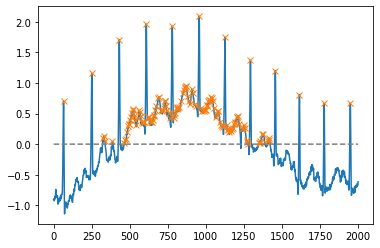

In [ ]:
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x),"--", color="gray")
plt.show()

[201 193 150 204 153 212 168 208 167 156 158 175 221 172 173 217 169 179
 169 152 162 155 152 184 151 194 185 175 218 163 218 266 205 154 153 159
 195 152 151 197 186 194 154 150 191 165 173 288 200 198 195]


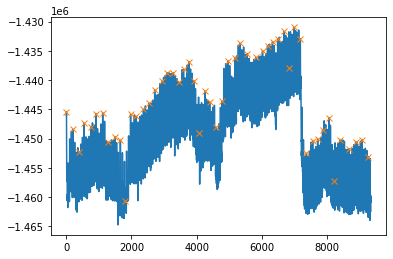

In [7]:
peaks, _ = find_peaks(x, distance=150)
print(np.diff(peaks))

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

0.545


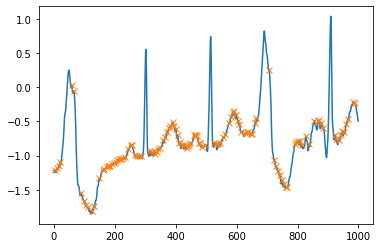

In [ ]:
peaks, properties = find_peaks(x, prominence=(None, 0.6))
print(properties["prominences"].max())
plt.plot(x)
plt.plot(peaks, x[peaks],"x")
plt.show()

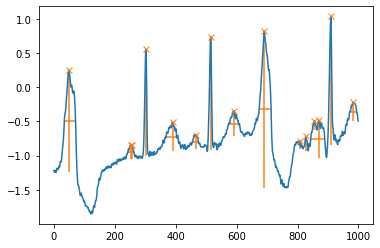

In [ ]:
x = electrocardiogram()[17000:18000]
peaks, properties = find_peaks(x, prominence=0.1, width=2)
properties["prominences"], properties["widths"]

plt.plot(x)
plt.plot(peaks, x[peaks],  "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")

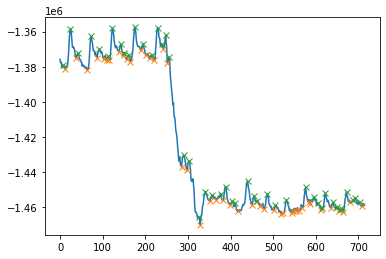

In [4]:
def find_peak_set(x, prominence = 0.1, width = 2):
  max, _ = find_peaks(x, prominence= prominence, width=width)
  min, _ = find_peaks(-x, prominence= prominence, width=width)
  return min, max

min, max = find_peak_set(x)
plt.plot(x)
plt.plot(min, x[min], 'x')
plt.plot(max, x[max],'x')

## This code to implement compressed searching similarity in the book "Data Mining In Time Series Databases", 2004, Marj Last et al.
- Three functions are implemented
  * Find_First
  * Find_Min
  * Find_Max



## Alogrithm

In [ ]:
## Find the first important point fucntion
## input: set of points
## output: indices of the first important points
minSet = []
maxSet = []
peakSet = []
def Find_Important(a, R):
  a1 = a - a.min() + 0.000001 ##remove the 0 problems
  if len(a) != 0:
    peakSet.append(0);

  k = Find_First(a1, R)
  #print(k)
  if k < len(a1) and a1[k]> a1[0]:
    k = Find_Maximum(a1, R, k)
    #print(k)
  while (k < len(a1)):
    k = Find_Minimum(a1, R, k);
    #print(k)
    k = Find_Maximum(a1, R, k);
    #print(k)
  peakSet.append(len(a1)-1)
  return peakSet

def Find_First(a, R):
  
  n = len(a) ;
  if n == 0:
    return -1
  else:
    iMin = 1; iMax = 1; i =2
    while i < n and (a[i]/a[iMin]) < R and (a[iMax]/a[i]) < R:
      if a[i] < a[iMin]: 
        iMin = i;
      if a[i] > a[iMax]:
        iMax = i;
      i = i + 1
    if iMin < iMax:
      minSet.append(iMin)
      peakSet.append(iMin)
    else:
      maxSet.append(iMax)
      peakSet.append(iMax)
  return i
  
def Find_Minimum(a, R, i):
  n = len(a)
  if i == n:
    return n
  iMin = i
  while i < n and (a[i]/a[iMin]) < R:
    if a[i] < a[iMin]:
      iMin = i;
    i = i + 1;
  if i == n:
    return i
  if i<n or a[iMin] < a[i]:
    minSet.append(iMin)
    peakSet.append(iMin)
  return i

def Find_Maximum(a, R, i):
  n = len(a)
  if i == n:
    return n
  iMax = i
  while i < n and (a[iMax]/a[i]) < R:
    if a[i] > a[iMax]:
      iMax = i;
    i = i + 1;
  if i == n:
    return i
  if i<n or a[iMax] > a[i]:
    maxSet.append(iMax)
    peakSet.append(iMax)
  return i
### Find important point




In [ ]:
type(x)

numpy.ndarray

In [ ]:
x.max()

1.04

In [ ]:
Find_First(x, R=1.5)

4250

### Print out the set of important peaks

In [ ]:
minSet = []
maxSet = []
peakSet = []
peakSet = Find_Important(x, R= 1.9)
print(peakSet, minSet, maxSet)

27
46
68
73
89
96
255
322
436
604
615
777
785
954
962
1123
1131
1290
1298
1453
1461
1608
1618
1690
1756
1772
1780
1849
1938
1943
1953
2000
2000
[0, 4, 28, 65, 72, 80, 90, 251, 274, 431, 450, 608, 769, 779, 786, 956, 1115, 1125, 1283, 1292, 1446, 1456, 1605, 1614, 1644, 1695, 1766, 1776, 1783, 1867, 1938, 1948, 1999] [4, 28, 72, 90, 274, 450, 769, 786, 1115, 1283, 1446, 1605, 1644, 1766, 1783, 1938] [65, 80, 251, 431, 608, 779, 956, 1125, 1292, 1456, 1614, 1695, 1776, 1867, 1948]


In [ ]:
x + x.min()

-1.14

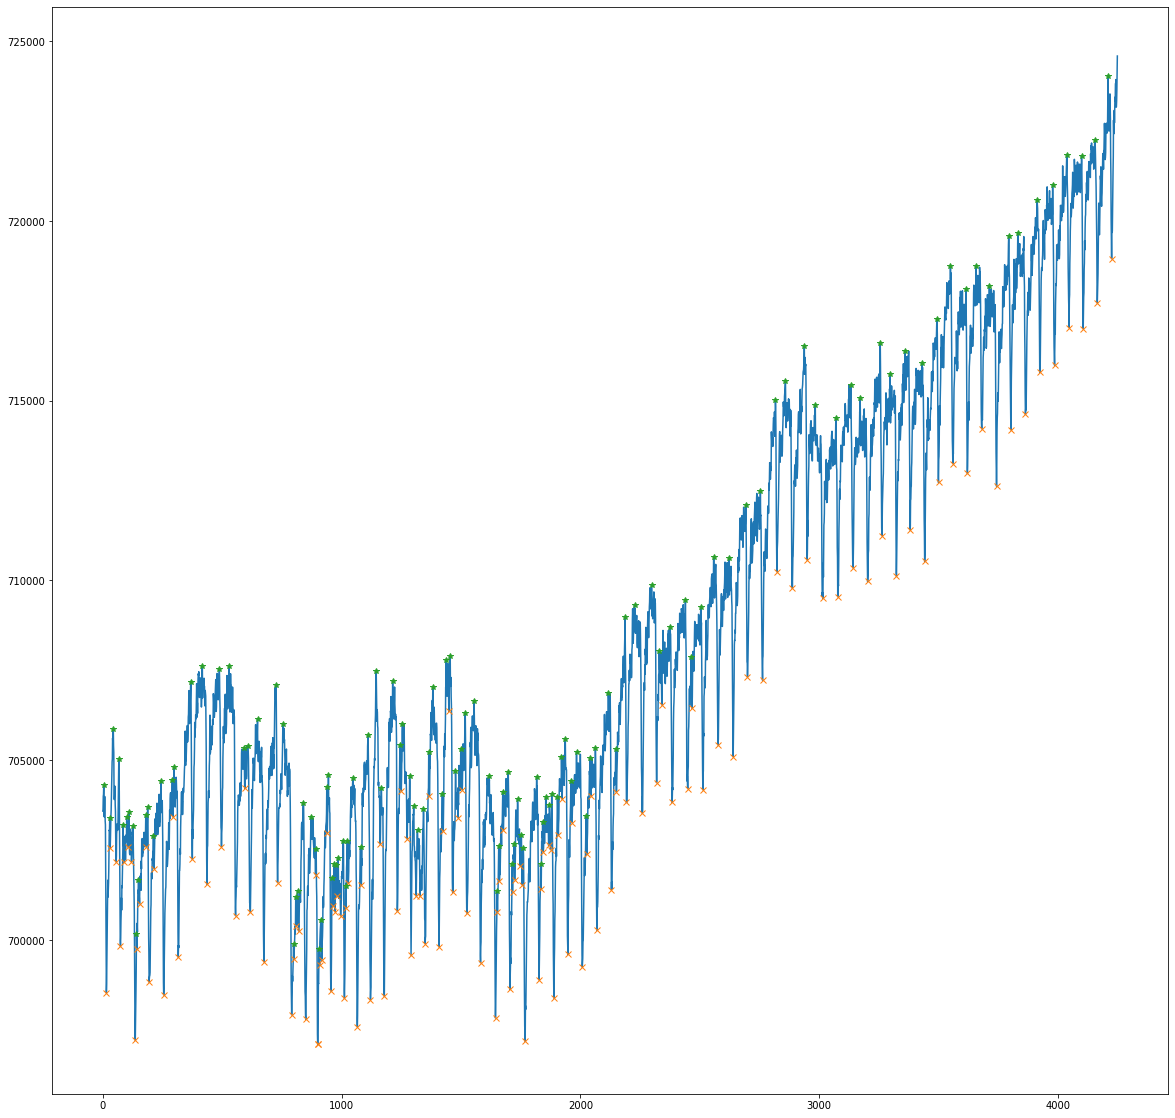

In [ ]:
#plt.figure(figsize=(20, 20))

plt.plot(x)
plt.plot(minSet, x[minSet], 'x')
plt.plot(maxSet, x[maxSet], '*')


### Test PPG signals

### Import data

In [ ]:
import pandas as pd
ppg  = pd.read_csv('cunA0.csv')

In [ ]:
ppg.describe()

,850nm,640nm,940nm,580nm,Channel 5,Channel 6,Channel 7,Channel 8
count,4250.000000,4.250000e+03,4250.000000,4.250000e+03,4250.0,4250.0,4250.0,4250.0
mean,526584.883765,-1.187460e+06,708623.464471,-1.549472e+06,0.0,0.0,0.0,0.0
std,5200.074713,3.806470e+03,6361.330314,1.549756e+03,0.0,0.0,0.0,0.0
min,516146.000000,-1.195450e+06,697098.000000,-1.554290e+06,0.0,0.0,0.0,0.0
25%,522450.000000,-1.191038e+06,703486.000000,-1.550100e+06,0.0,0.0,0.0,0.0
50%,525057.000000,-1.185760e+06,706672.000000,-1.549110e+06,0.0,0.0,0.0,0.0
75%,531236.500000,-1.184040e+06,714236.000000,-1.548390e+06,0.0,0.0,0.0,0.0
max,539112.000000,-1.181630e+06,724586.000000,-1.546400e+06,0.0,0.0,0.0,0.0


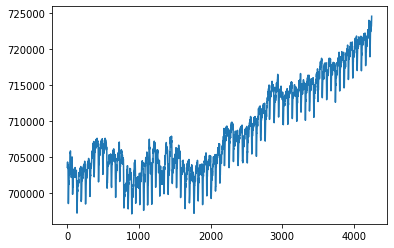

In [ ]:
x = ppg['940nm']
plt.plot(x)

In [ ]:
### Extracting prominent peaks 
minSet1 = []
maxSet1 = []
peakSet1 = []
peakSet2 = []
peakSet1 = Find_Important(ppg['940nm'], R= 1.5)
peakSet2 = Find_Important(ppg['850nm'], R= 1.5)
#print(peakSet, minSet, maxSet)

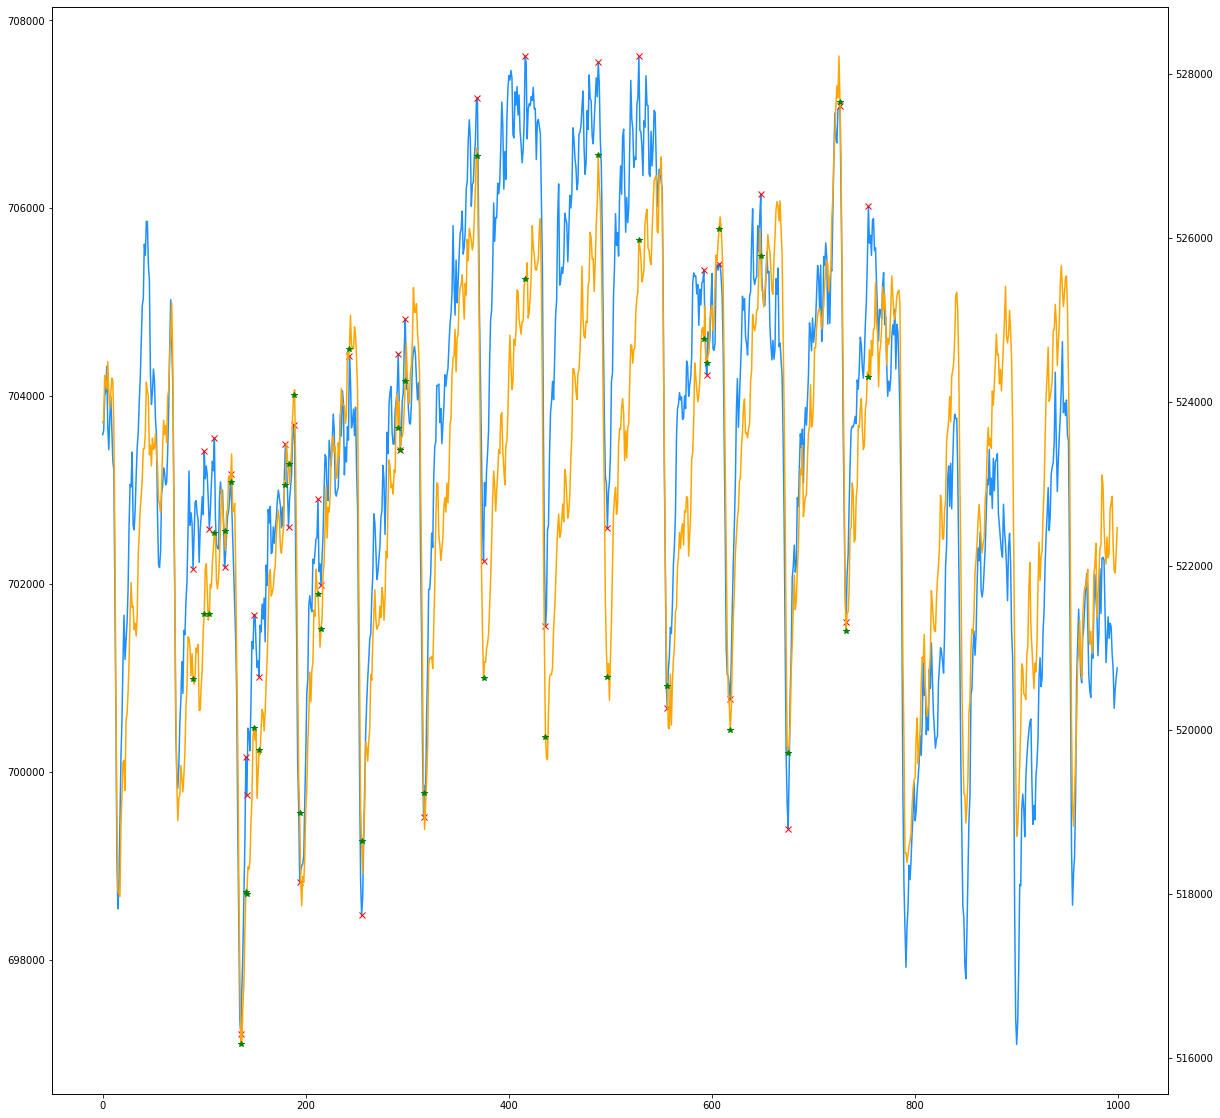

In [ ]:
### Plot data
#plt.figure()
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(ppg['940nm'][0:1000], color= 'dodgerblue')
#t= range(50)
pk1 = peakSet1[10:50]
ax.plot(pk1, ppg['940nm'][pk1], 'rx')
ax2 = ax.twinx()

pk2 = peakSet2[10:50]
ax2.plot(ppg['850nm'][0:1000], color= 'orange')
ax2.plot(pk2, ppg['850nm'][pk2], 'g*')

fig.savefig('peaks.png', format='png', dpi=300)

In [ ]:
len(peakSet1), len(peakSet2)

(1491, 1491)

# import data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
ppg  = pd.read_csv('nomarlcun2.csv')

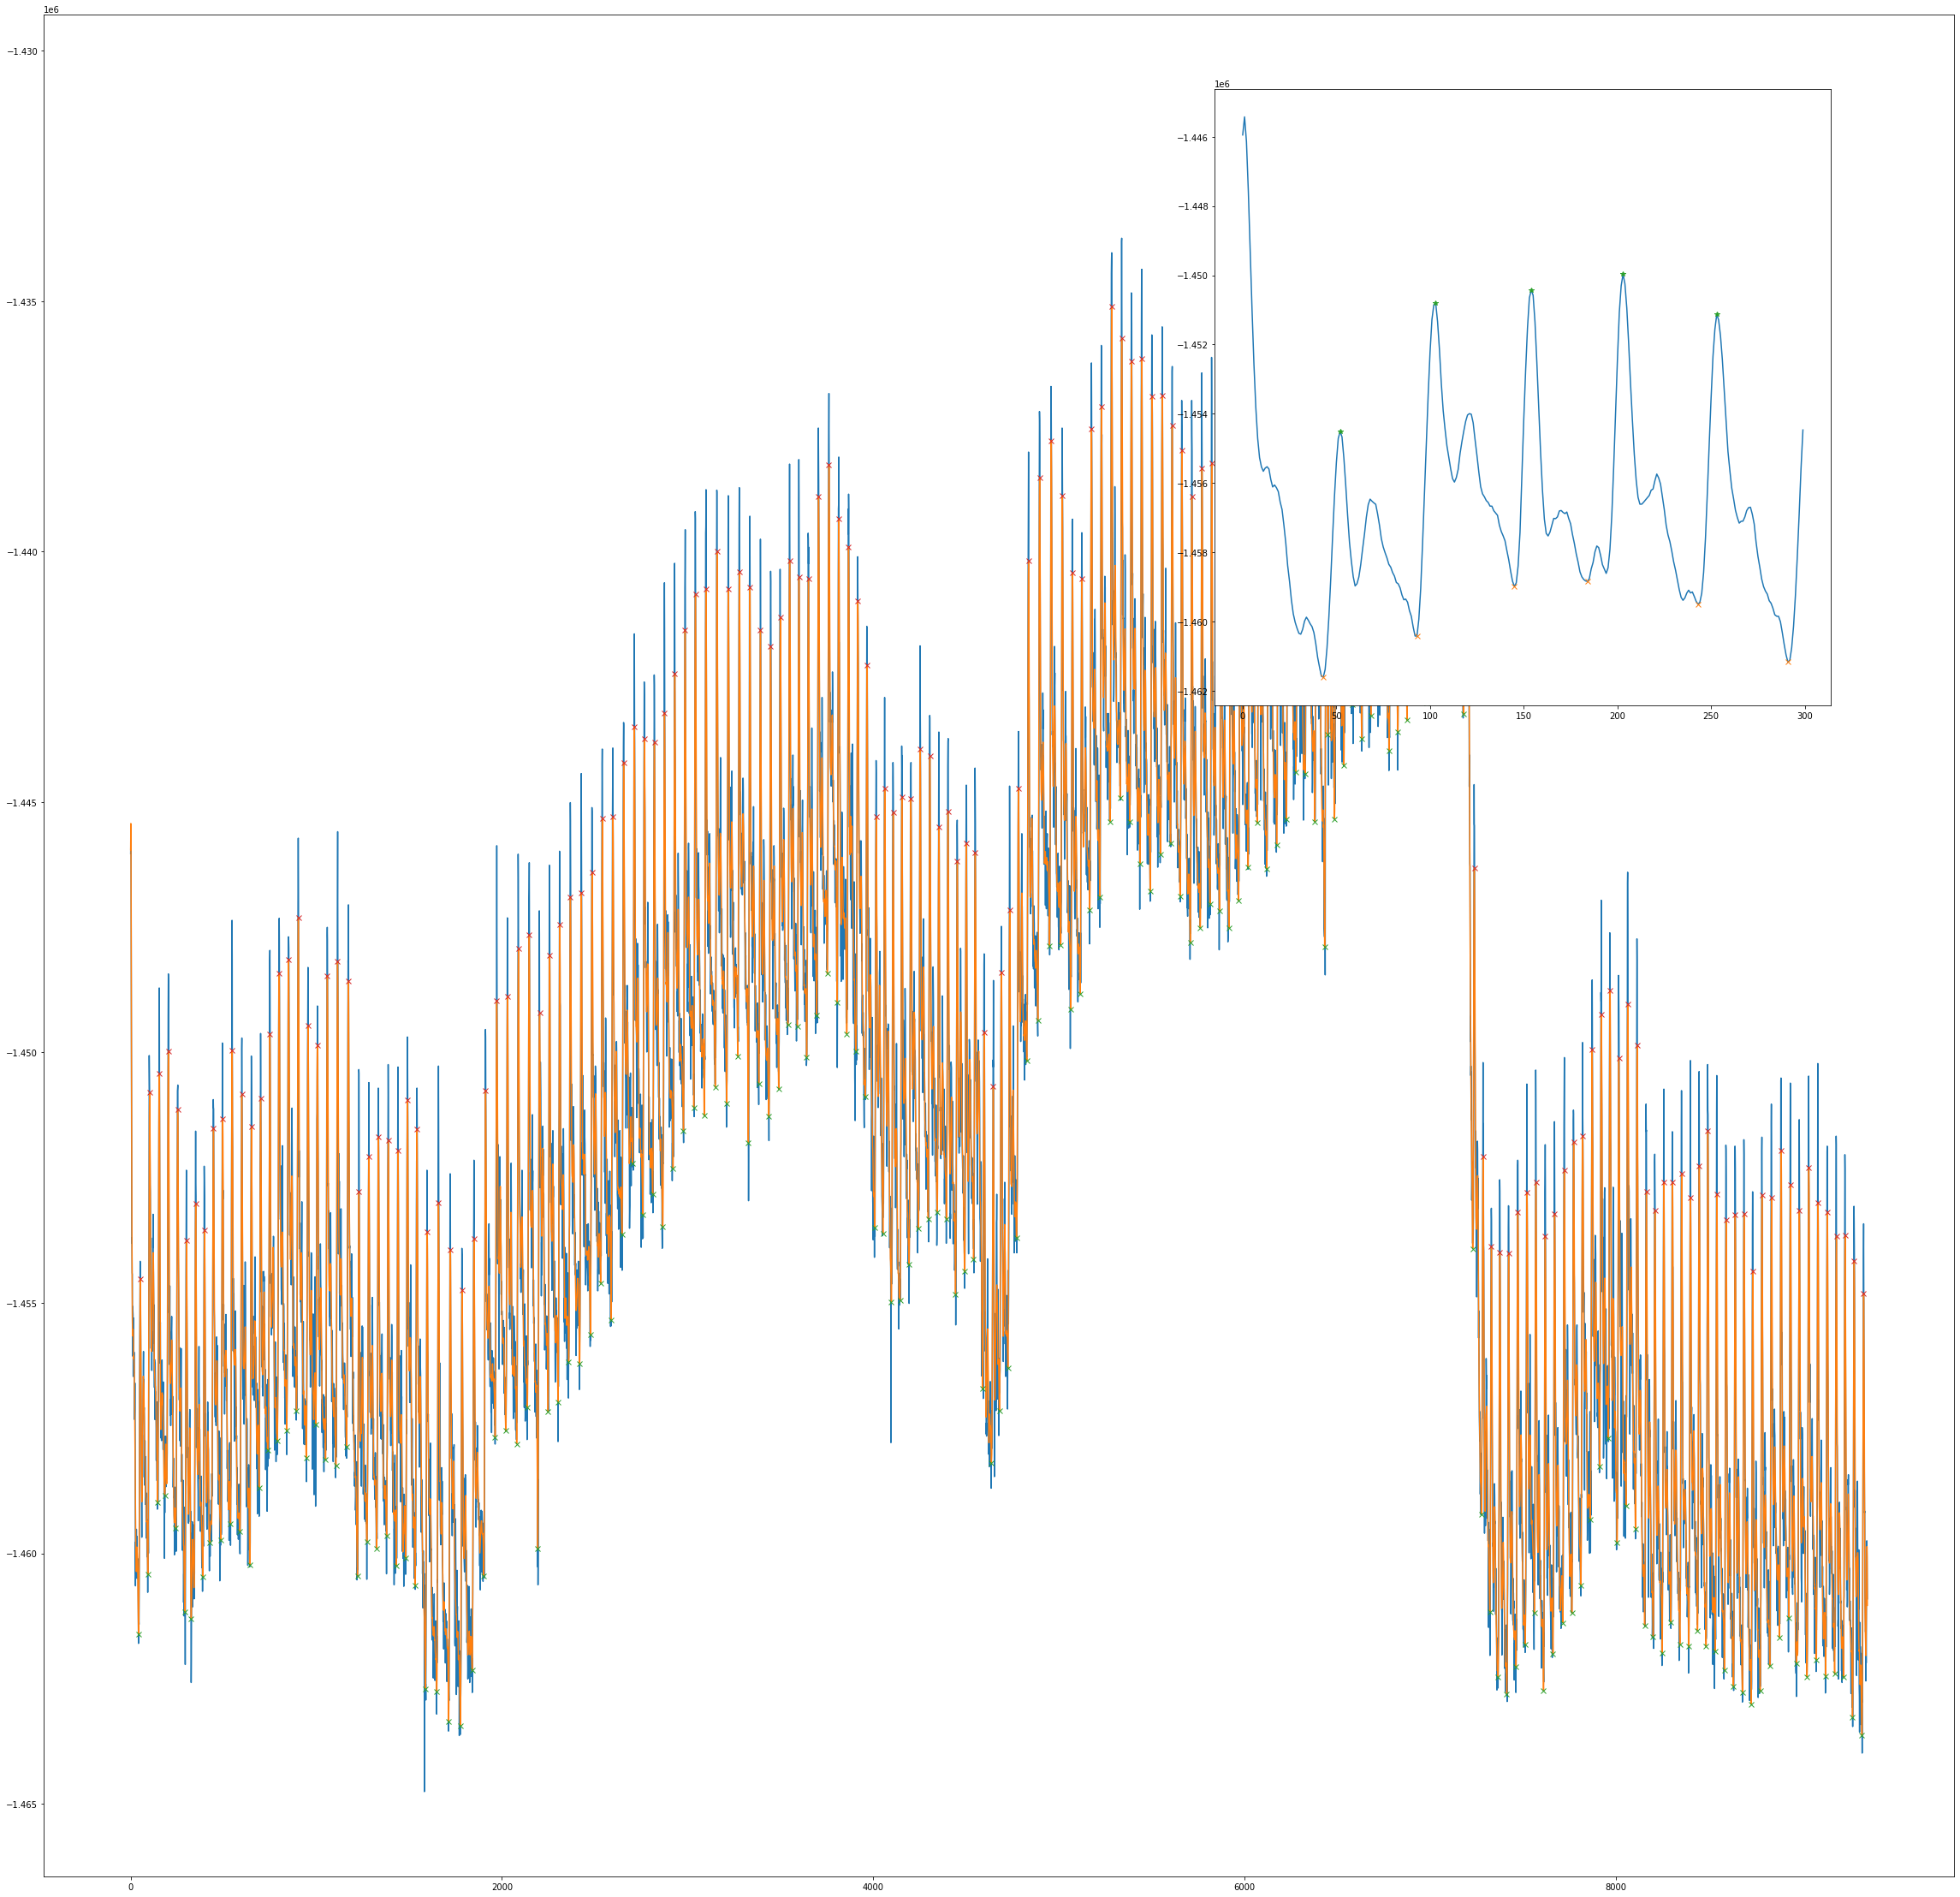

In [31]:
from scipy.signal import savgol_filter
def find_peak_set(x, prominence = 0.1, width = 2):
  max, _ = find_peaks(x, prominence= prominence, width=width)
  min, _ = find_peaks(-x, prominence= prominence, width=width)
  return min, max

x = ppg['580nm']
xfilt = savgol_filter(x,21,5)
min, max = find_peak_set(xfilt, prominence= 3000)

plt.figure(figsize=(40,40))
plt.plot(x)
plt.plot(xfilt)
plt.plot(min, xfilt[min], 'x')
plt.plot(max, xfilt[max],'x')

start = 0
stop = 300
xdetail = xfilt[start:stop]

submin = [i - start for i in min if i >= start and i <= stop]
submax = [i - start for i in max if i >= start and i <= stop]
sub_axes = plt.axes([.6, .6, .25, .25]) 
sub_axes.plot(xdetail) 
sub_axes.plot(submin, xdetail[submin], 'x') 
sub_axes.plot(submax, xdetail[submax], '*') 

In [34]:
PT = np.diff(min)
PT

array([50, 52, 39, 59, 48, 35, 62, 37, 60, 53, 51, 52, 51, 48, 50, 51, 52,
       53, 51, 53, 56, 56, 59, 51, 53, 53, 53, 50, 50, 56, 62, 64, 62, 64,
       63, 61, 57, 59, 57, 57, 55, 54, 57, 59, 58, 55, 57, 58, 58, 54, 54,
       54, 55, 56, 56, 56, 59, 62, 60, 57, 56, 54, 53, 50, 51, 50, 55, 56,
       53, 52, 49, 50, 51, 45, 45, 47, 49, 50, 53, 48, 50, 49, 49, 48, 48,
       48, 43, 46, 46, 56, 59, 63, 60, 54, 51, 51, 55, 54, 55, 52, 56, 55,
       54, 55, 51, 55, 54, 52, 51, 51, 52, 52, 48, 52, 54, 51, 52, 49, 53,
       53, 17, 36, 51, 47, 49, 49, 49, 50, 46, 50, 52, 55, 51, 48, 47, 50,
       51, 46, 45, 45, 47, 50, 49, 49, 50, 51, 52, 50, 48, 50, 51, 47, 47,
       48, 51, 50, 45, 49, 46, 49, 48, 47, 46, 49, 50, 49, 48, 47, 49, 51,
       53, 50, 40, 58, 50, 50, 49, 47, 49, 51])

In [45]:
d1x = np.diff(xfilt)
d1x, dydx

(array([  522.1492855 ,  -713.26006945, -1421.68352243, ...,
          263.85359492,  -199.36542862,  -974.39495287]),
 array([  522.1492855 ,   -95.55539198, -1067.47179594, ...,
           32.24408315,  -586.88019075,  -974.39495287]))

In [54]:
d1x = np.gradient(xfilt, 1)
d2x = np.gradient(d1x,1)

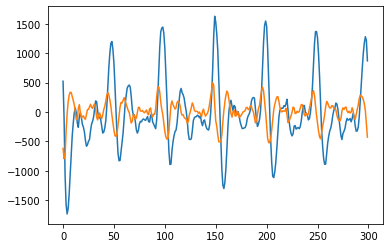

In [63]:
#plt.plot(xfilt[0:300]/1000)
plt.plot(d1x[0:300])
plt.plot(d2x[0:300])

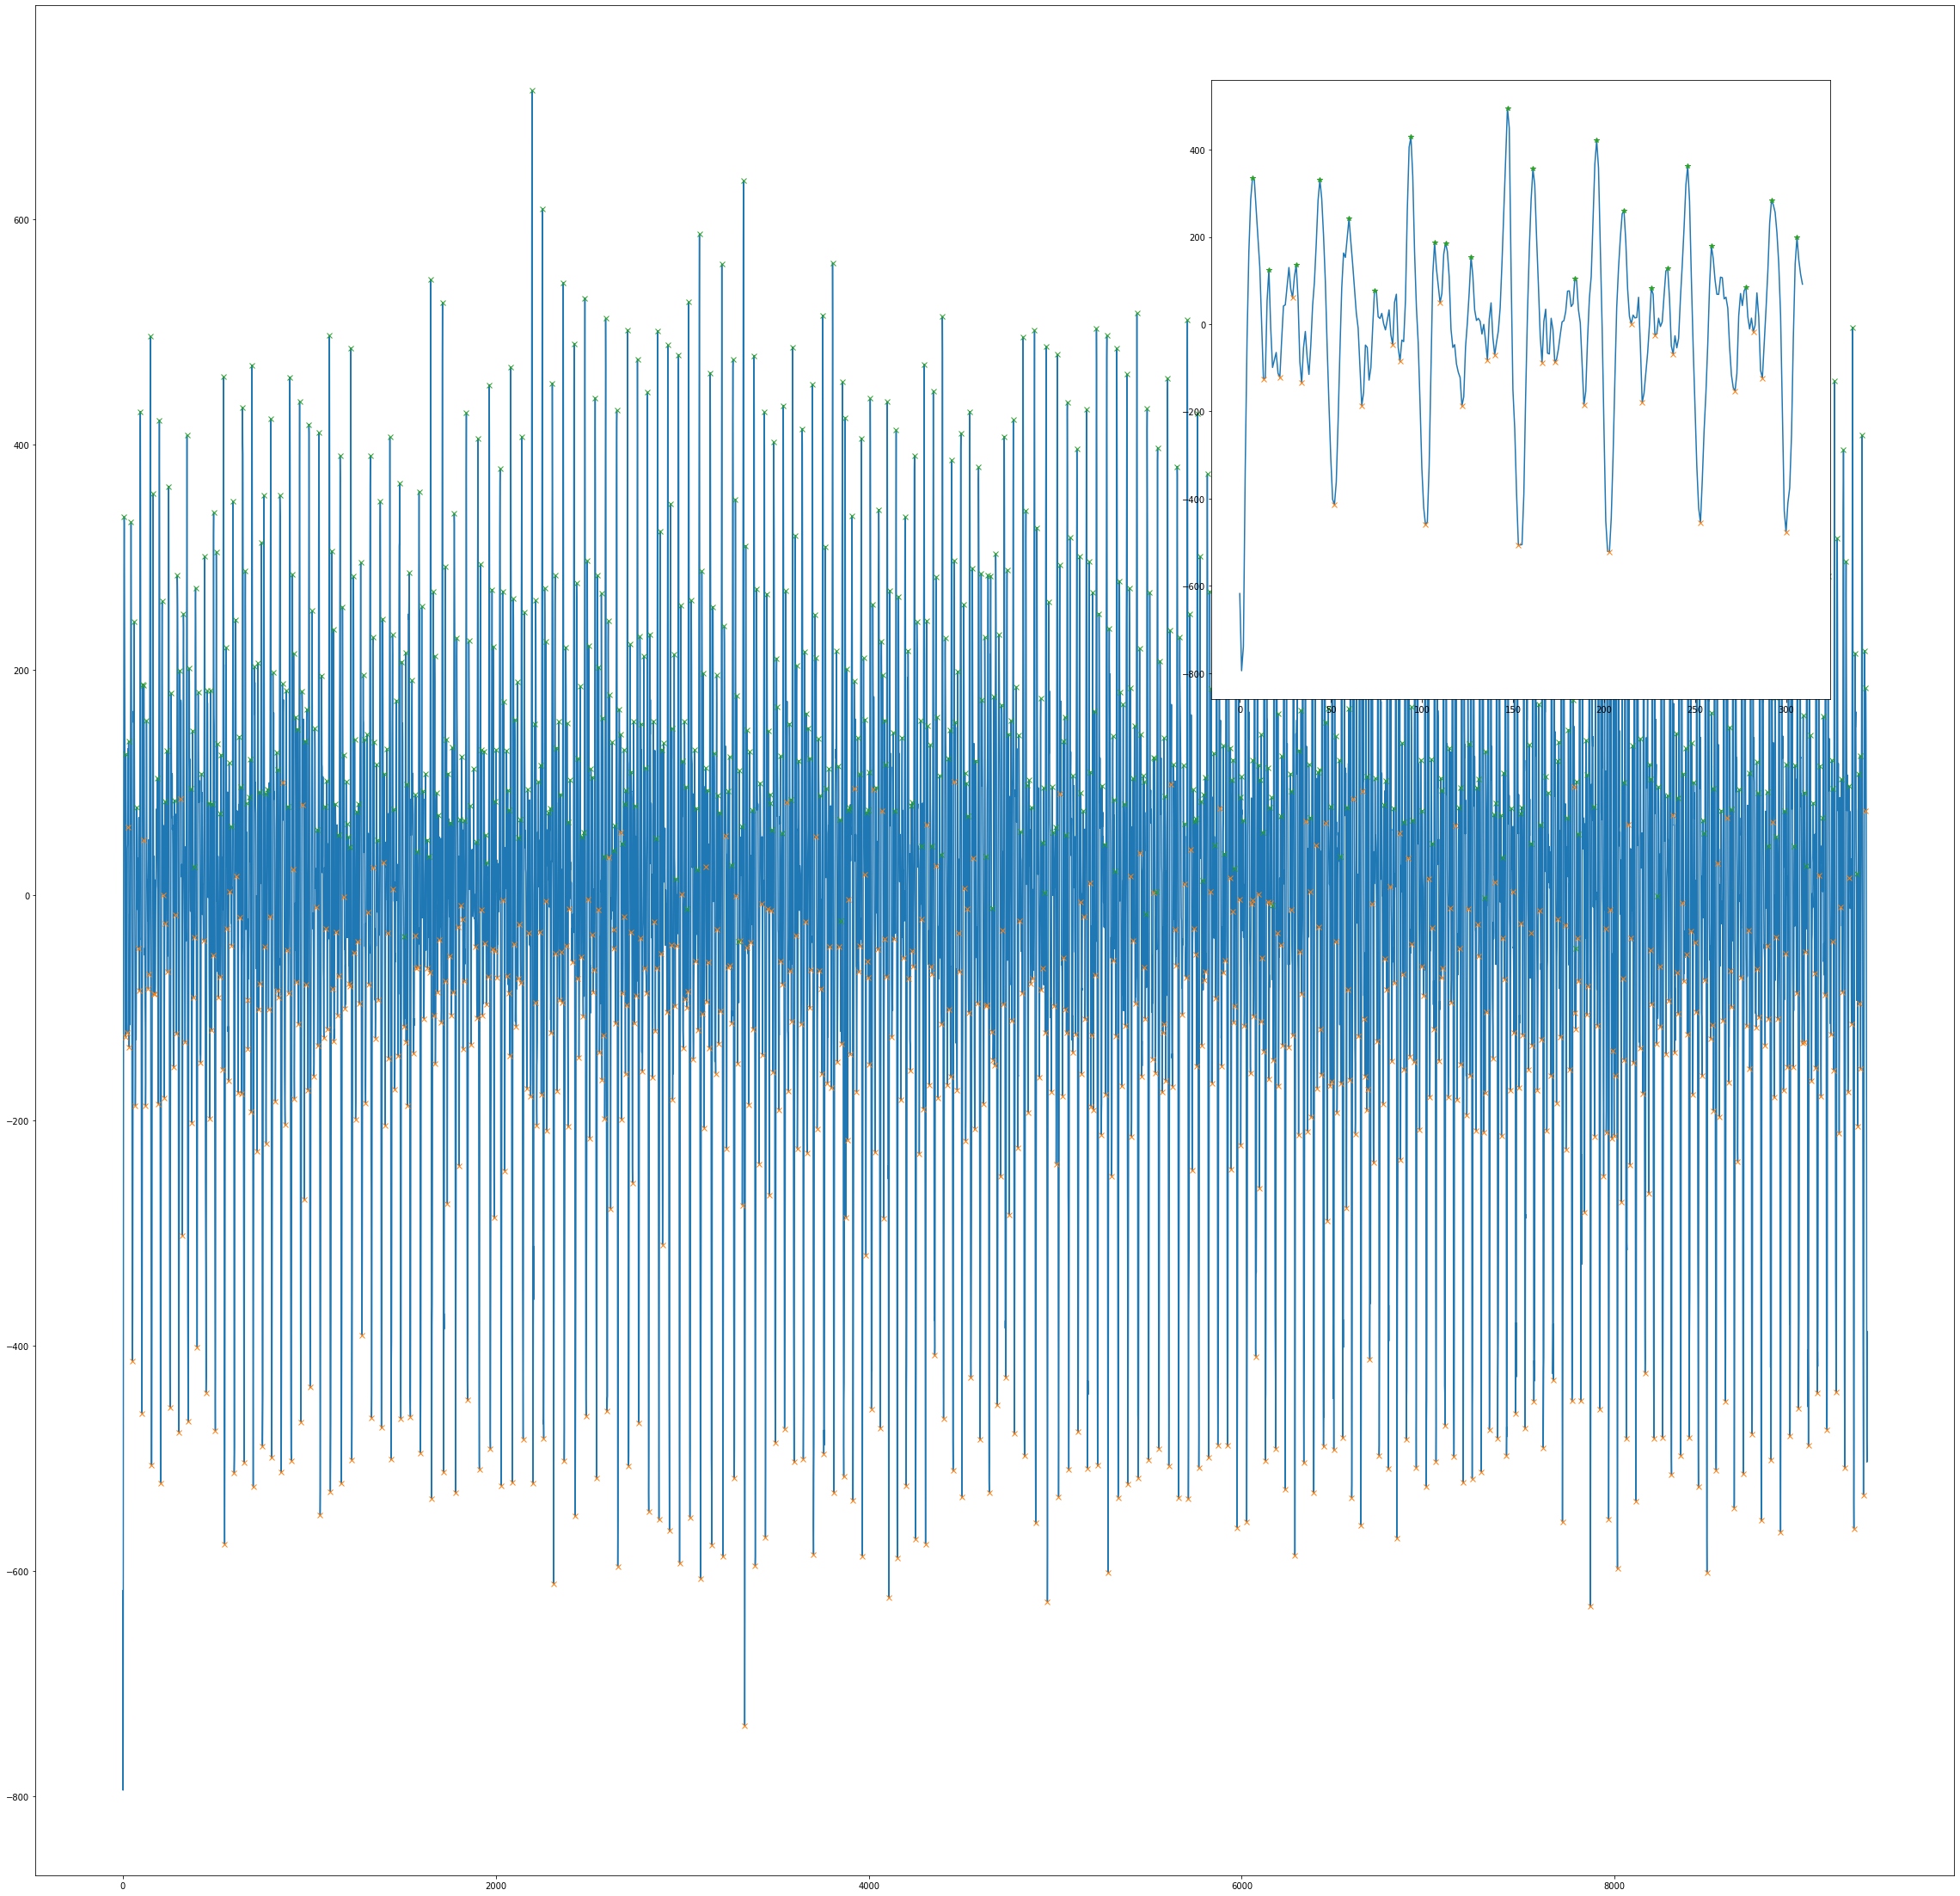

In [172]:
min2, max2 = find_peak_set(d2x, prominence=50, width= 2)

plt.figure(figsize=(40,40))
plt.plot(d2x)
plt.plot(min2, d2x[min2], 'x')
plt.plot(max2, d2x[max2],'x')

start = 0
stop = 310
d2xdetail = d2x[start:stop]

submin2 = [i - start for i in min2 if i >= start and i < stop]
submax2 = [i - start for i in max2 if i >= start and i < stop]
sub_axes2 = plt.axes([.6, .6, .25, .25]) 
sub_axes2.plot(d2xdetail) 
sub_axes2.plot(submin2, d2xdetail[submin2], 'x') 
sub_axes2.plot(submax2, d2xdetail[submax2], '*') 

In [77]:
np.diff(min2)

array([50, 51, 36, 14, 50, 47, 19, 31, 48, 48, 50, 50, 51, 53, 49, 50, 19,
       30, 51, 54, 52, 49, 54, 55, 59, 56, 54, 52, 53, 51, 53, 51, 54, 60,
       64, 20, 44, 64, 64, 59, 20, 38, 19, 41, 58, 53, 57, 53, 57, 59, 58,
       20, 37, 56, 19, 38, 58, 55, 53, 55, 19, 37, 17, 38, 55, 57, 61, 59,
       61, 43, 13, 56, 20, 35, 20, 34, 48, 52, 17, 32, 55, 55, 55, 52, 12,
       37, 50, 20, 29, 47, 19, 27, 46, 48, 50, 54, 49, 47, 51, 48, 48, 49,
       49, 44, 45, 17, 28, 55, 19, 41, 63, 60, 55, 50, 50, 54, 56, 54, 53,
       56, 55, 55, 53, 53, 52, 56, 52, 50, 52, 51, 52, 48, 20, 32, 55, 51,
       52, 48, 53, 53, 19, 36, 17, 31, 20, 28, 49, 48, 20, 30, 49, 47, 50,
       53, 54, 52, 48, 48, 50, 48, 48, 44, 45, 47, 49, 50, 48, 50, 19, 35,
       49, 19, 32, 48, 19, 32, 51, 47, 16, 13, 18, 47, 51, 50, 48, 46, 48,
       50, 44, 20, 30, 46, 49, 17, 33, 47, 19, 29, 48, 49, 53, 51, 50, 46,
       53, 47, 21, 32, 49, 16, 30, 49, 51])

In [79]:
np.mean(np.diff(min2))

43.57746478873239

In [ ]:
min2filt = [i for i in min2 if ]

### Algorithm to select the max peak 
* Step1: Select raw maxpeak based on prominent one (say:500)
* Step2: Filtering some outliners
* Step3: Select fine maxpeak based on prominent two (say:50)
* Step4: Select next peak based on first max peak

In [181]:
#Step1: Select raw maxpeak
min2, max2 = find_peak_set(d2x, prominence=500)
#Step2: Filtering some outliners
min2filt=[]
med = np.median(np.diff(min2))
val = 0
while (val < len(min2)-1):
  idx = 1
  while min2[val+idx] - min2[val] <  0.75*med:
    idx =idx + 1
  min2filt.append(min2[val])
  val = val + idx
if min2[-1] - min2filt[-1] > 0.9*med:
  min2filt.append(min2[-1]) 
#Step3: Select fine maxpeak based on prominent two (say:50)
minfine2, maxfine2 = find_peak_set(d2x, prominence=50)
min2filt2=[]
val = 0
for idx in min2filt:
  min2filt[0] =  



In [179]:
np.median(np.diff(minfine2)),np.median(np.diff(min2filt))

(11.0, 51.0)

In [182]:
len(min2filt), len(minfine2)

(180, 817)

In [185]:
minfine2.find(min2filt[0])

AttributeError: ignored

In [147]:
np.mean(np.diff(min2filt))

51.859550561797754